In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
stellar_df = pd.read_csv('star_classification.csv')
stellar_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


***Exploratory Data Analysis***

In [5]:
stellar_df.shape

(100000, 18)

In [6]:
stellar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
stellar_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [8]:
stellar_df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


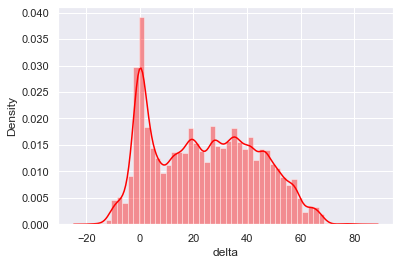

In [9]:
sns.set(style="darkgrid", palette='dark')

sns.distplot(stellar_df['delta'], color='red')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='redshift', ylabel='Density'>

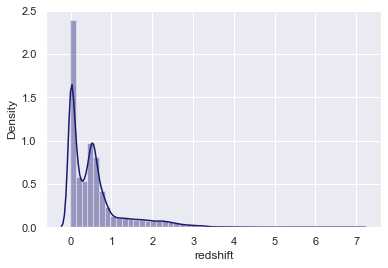

In [10]:
sns.distplot(stellar_df['redshift'], color='midnightblue')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='fiber_ID', ylabel='Density'>

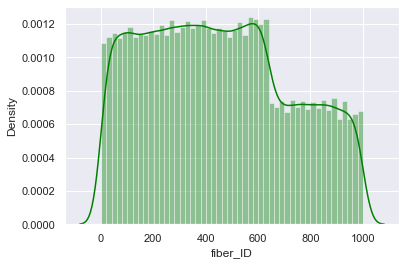

In [11]:
sns.distplot(stellar_df['fiber_ID'], color= 'green')

<AxesSubplot:xlabel='alpha', ylabel='delta'>

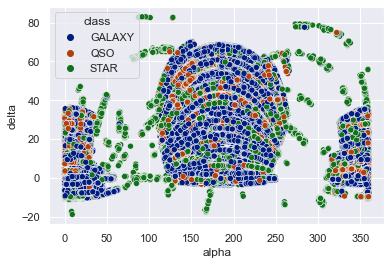

In [13]:
sns.scatterplot(x = stellar_df.alpha, y = stellar_df.delta, data = stellar_df, hue = 'class')

<AxesSubplot:>

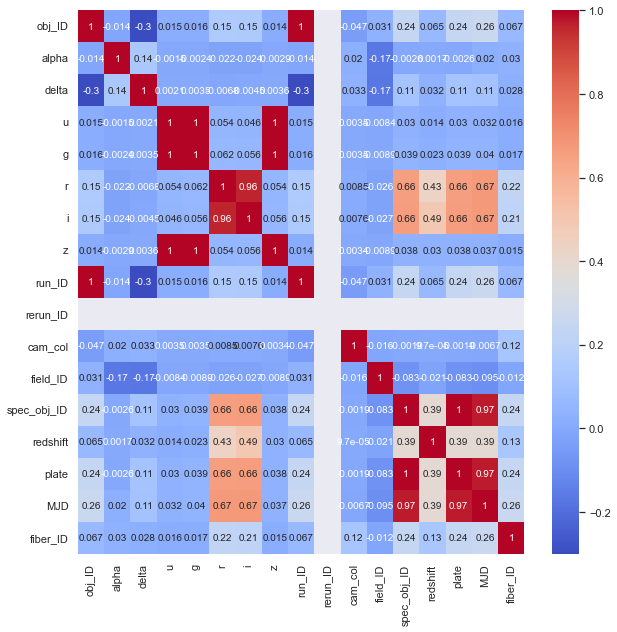

In [14]:
plt.figure(figsize=(10,10))
corr = stellar_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [15]:
#Encoding the 'class' column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
stellar_df['class'] = le.fit_transform(stellar_df['class'])

***Performing Feature Selection***


In [16]:
X = stellar_df[['u', 'g', 'r', 'i', 'z', 'redshift', 'plate']]
Y = stellar_df['class']

In [17]:
X

,u,g,r,i,z,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751


In [18]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

***Taking into account the imbalance in the dataset for the records in each category of 'class' feature column***


In [19]:
#Resampling

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 30, k_neighbors= 5)
X_smote, Y_smote = smote.fit_resample(X, Y)


In [20]:
Y_smote.value_counts()

2    59445
1    59445
0    59445
Name: class, dtype: int64

***Splitting the dataset for training/testing and performing classification algorithms***

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size= 0.2, random_state= 30)


**Using Logistic Regression for Classification**

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter= 1000)
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_pred))

print('Classification Report: \n', classification_report(Y_test, Y_pred))



Accuracy Score:  0.8986738441696807
Confusion Matrix: 
 [[ 9425   539  1990]
 [  790 11018    45]
 [  227    23 11610]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     11954
           1       0.95      0.93      0.94     11853
           2       0.85      0.98      0.91     11860

    accuracy                           0.90     35667
   macro avg       0.90      0.90      0.90     35667
weighted avg       0.90      0.90      0.90     35667



/Users/omkar/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Using K-Nearest Neighbors**

In [31]:
#using KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))

print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_pred))

print('Classification Report: \n', classification_report(Y_test, Y_pred))



Accuracy Score:  0.9061317183951552
Confusion Matrix: 
 [[10677   432   845]
 [  502 11119   232]
 [  982   355 10523]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     11954
           1       0.93      0.94      0.94     11853
           2       0.91      0.89      0.90     11860

    accuracy                           0.91     35667
   macro avg       0.91      0.91      0.91     35667
weighted avg       0.91      0.91      0.91     35667



In [32]:
#using neural network for classification

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes= (100, 100, 100), max_iter= 1000)
mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))

print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_pred))

print('Classification Report: \n', classification_report(Y_test, Y_pred))



Accuracy Score:  0.5661255502285025
Confusion Matrix: 
 [[ 2480     6  9468]
 [ 4373  5852  1628]
 [    0     0 11860]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.21      0.26     11954
           1       1.00      0.49      0.66     11853
           2       0.52      1.00      0.68     11860

    accuracy                           0.57     35667
   macro avg       0.63      0.57      0.54     35667
weighted avg       0.63      0.57      0.53     35667



In [33]:
#using random forest classifier and using hyperparameter tuning for the estimators
random_forest_df = pd.DataFrame(columns=['Estimators', 'Recall Score'])

from sklearn.ensemble import RandomForestClassifier

for i in range(1, 50):
    model = RandomForestClassifier(n_estimators= i, random_state= 30)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    random_forest_df = random_forest_df.append({'Estimators': i, 'Recall Score': accuracy_score(Y_test, Y_pred)}, ignore_index=True)

random_forest_df



,Estimators,Recall Score
0,1.0,0.964617
1,2.0,0.963860
2,3.0,0.976589
3,4.0,0.977654
4,5.0,0.979449
5,6.0,0.979757
6,7.0,0.980178
7,8.0,0.980234
8,9.0,0.980206
9,10.0,0.980879


In [47]:
#choosing the best estimator

random_forest_df[random_forest_df['Recall Score'] == random_forest_df['Recall Score'].max()]


,Estimators,Recall Score
47,48.0,0.982168


In [48]:
#using decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state= 30)

dtc.fit(X_train, Y_train)

Y_pred = dtc.predict(X_test)

print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))

print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_pred))

print('Classification Report: \n', classification_report(Y_test, Y_pred))



Accuracy Score:  0.9727479182437547
Confusion Matrix: 
 [[11456   482    16]
 [  449 11404     0]
 [   25     0 11835]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     11954
           1       0.96      0.96      0.96     11853
           2       1.00      1.00      1.00     11860

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667



In [49]:
#using XGBoost Classifier

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state= 30)

xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

print('Accuracy Score: ', accuracy_score(Y_test, Y_pred))

print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_pred))

print('Classification Report: \n', classification_report(Y_test, Y_pred))



Accuracy Score:  0.9817478341323913
Confusion Matrix: 
 [[11720   221    13]
 [  415 11438     0]
 [    2     0 11858]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     11954
           1       0.98      0.96      0.97     11853
           2       1.00      1.00      1.00     11860

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667



In [51]:
#creating a dataframe to list the accuracy and recall scores of all the models

model_df = pd.DataFrame(columns=['Model', 'Accuracy Score'])

model_df = model_df.append({'Model': 'Logistic Regression', 'Accuracy Score': 0.8986}, ignore_index=True)

model_df = model_df.append({'Model': 'KNN', 'Accuracy Score':0.9061}, ignore_index=True)

model_df = model_df.append({'Model': 'MLP', 'Accuracy Score': 0.5661}, ignore_index=True)

model_df = model_df.append({'Model': 'Random Forest', 'Accuracy Score': 0.9821}, ignore_index=True)

model_df = model_df.append({'Model': 'Decision Tree', 'Accuracy Score': 0.9727}, ignore_index=True)

model_df = model_df.append({'Model': 'XGBoost', 'Accuracy Score': 0.9817}, ignore_index=True)

model_df


,Model,Accuracy Score
0,Logistic Regression,0.8986
1,KNN,0.9061
2,MLP,0.5661
3,Random Forest,0.9821
4,Decision Tree,0.9727
5,XGBoost,0.9817


In [53]:
#sort the dataframe in descending order of accuracy scores

model_df.sort_values(by= 'Accuracy Score', ascending= False, ignore_index= True)


,Model,Accuracy Score
0,Random Forest,0.9821
1,XGBoost,0.9817
2,Decision Tree,0.9727
3,KNN,0.9061
4,Logistic Regression,0.8986
5,MLP,0.5661
